In [ ]:
!pip install deap
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
from pandas import read_csv


# List of all the column names since there was none in the data
columns = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'

data = read_csv(url,header=None,names=columns)

X = data.iloc[:, 1:10]
y = data.iloc[:, 10:11]

print(data.shape)

X

(214, 11)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

encoder = ce.OrdinalEncoder()
X = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
# Define the XGBoost parameters
params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric':['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
from deap import base
from deap import creator
from deap import tools
import random

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
# fill in the with random floats for each type of hyper parameter
toolbox.register("h1", random.randint,0,6)
toolbox.register("h2", random.randint,0,1)
toolbox.register("h3", random.randint,0,1)
toolbox.register("h4", random.randint,0,3)
toolbox.register("h5", random.randint,0,2)

toolbox.register("IndividualCreator",tools.initCycle,creator.Individual,
                 (toolbox.h1,toolbox.h2,toolbox.h3,toolbox.h4,toolbox.h5),n=1)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
def getParams(individual):
    n_neighbors = [3, 5, 7, 9, 11, 13, 15][round(individual[0])]
    weights =  ['uniform', 'distance'][round(individual[1])] 
    p = [1, 2][round(individual[2])]
    algorithm =  ['auto', 'ball_tree', 'kd_tree', 'brute'][round(individual[3])]
    metric = ['euclidean', 'manhattan', 'minkowski'][round(individual[4])]
    return n_neighbors,weights, p, algorithm,metric

In [ ]:
# Test IndividualCreator
for i in range(10):
    a = toolbox.IndividualCreator()
    b = getParams(a)
    print(a, b)

[6, 0, 0, 3, 1] (15, 'uniform', 1, 'brute', 'manhattan')
[1, 1, 1, 2, 2] (5, 'distance', 2, 'kd_tree', 'minkowski')
[6, 1, 0, 1, 1] (15, 'distance', 1, 'ball_tree', 'manhattan')
[6, 1, 1, 1, 2] (15, 'distance', 2, 'ball_tree', 'minkowski')
[3, 1, 1, 0, 1] (9, 'distance', 2, 'auto', 'manhattan')
[4, 1, 1, 2, 1] (11, 'distance', 2, 'kd_tree', 'manhattan')
[0, 1, 1, 0, 0] (3, 'distance', 2, 'auto', 'euclidean')
[1, 0, 0, 0, 2] (5, 'uniform', 1, 'auto', 'minkowski')
[5, 0, 0, 3, 1] (13, 'uniform', 1, 'brute', 'manhattan')
[5, 0, 0, 2, 0] (13, 'uniform', 1, 'kd_tree', 'euclidean')


In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

def getAccuracy(individual):
    n_neighbors,weights, p, algorithm,metric = getParams(individual)
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors,
                                  weights=weights,
                                  p=p,
                                  algorithm=algorithm,
                                  metric=metric)

    cv_results = model_selection.cross_val_score(classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')
    return cv_results.mean()

In [ ]:
# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, 
                 toolbox.IndividualCreator)
# fitness calculation
def classificationAccuracy(individual):
    return getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)

# genetic operators:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=1.0, low=[0, 0, 0, 0, 0], up=[6, 1, 2, 3, 2], indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
from deap import algorithms

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.6   # probability for mutating an individual
MAX_GENERATIONS = 10
HALL_OF_FAME_SIZE = 10

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = algorithms.eaSimple(population,
                                          toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

# print best solution found:
print("- Best solution is: ")
print("params = ", hof.items[0], getParams(hof.items[0]))
print("Accuracy = %1.5f" % hof.items[0].fitness.values[0])

gen	nevals	max     	avg     
0  	20    	0.684314	0.633415
1  	19    	0.684314	0.646307
2  	19    	0.689869	0.650131
3  	19    	0.689869	0.668464
4  	19    	0.689869	0.679493
5  	19    	0.689869	0.676814
6  	19    	0.689869	0.686977
7  	20    	0.689869	0.684069
8  	16    	0.689869	0.686683
9  	20    	0.689869	0.670686
10 	20    	0.689869	0.679101
- Best solution is: 
params =  [0.45707844668165043, 1, 1, 1.5248661877096468, 1.1613029257370437] (3, 'distance', 2, 'kd_tree', 'manhattan')
Accuracy = 0.68987


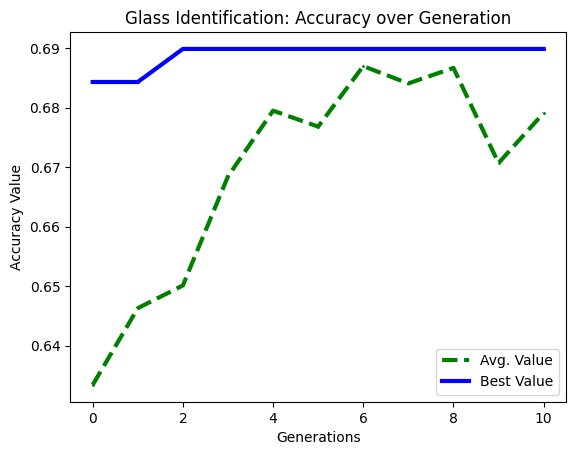

In [ ]:
import matplotlib.pyplot as plt

np_max = np.zeros(len(logbook), dtype=float)
np_avg = np.zeros(len(logbook), dtype=float)
np_gen = np.arange(len(logbook))

for i in range(0, len(logbook)):
  np_max[i] = float(logbook[i]['max'])
  np_avg[i] = float(logbook[i]['avg'])


plt.plot(np_gen, np_avg, color='green', linestyle='dashed', linewidth=3,marker='o', markerfacecolor='blue', markersize=1, label='Avg. Value')
plt.plot(np_gen, np_max, color='blue', linestyle='solid', linewidth=3,marker='o', markerfacecolor='blue', markersize=1, label='Best Value')
plt.xlabel('Generations')
plt.ylabel('Accuracy Value')
plt.title('Glass Identification: Accuracy over Generation')
plt.legend(loc='lower right')
plt.show()

Default Parameters

In [ ]:
knn_classifier1 = KNeighborsClassifier()

cv_results = model_selection.cross_val_score(knn_classifier1,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[KNN] mean: ',cv_results.mean())

[KNN] mean:  0.6258169934640523


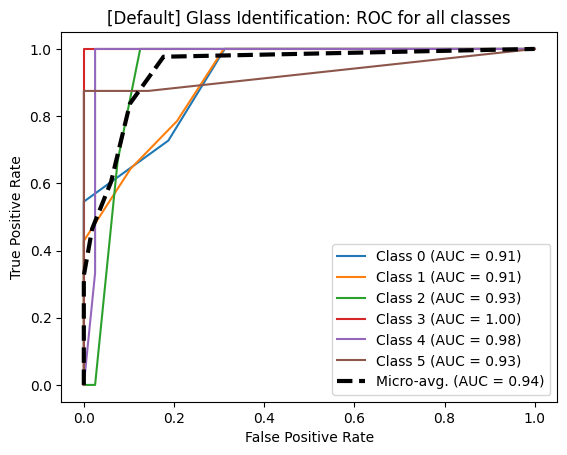

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier


# Convert y_test to one-hot encoded matrix
n_classes = len(np.unique(y_train))
y_test_l = label_binarize(y_test, classes=np.arange(n_classes))


# Create an OvR classifier
ovr_classifier = OneVsRestClassifier(knn_classifier1)

# Fit the model to the training data
ovr_classifier.fit(X_train,y_train)
# Predict probabilities for each class
y_scores1 = ovr_classifier.predict_proba(X_test)

# Compute the FPR, TPR, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_l[:, i], y_scores1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_l.ravel(), y_scores1.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Aggregate the results with macro-average
all_fpr = np.unique(np.concatenate(list(fpr.values())))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot the ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot(fpr_micro, tpr_micro, color='black', linestyle='--', linewidth=3, label='Micro-avg. (AUC = %0.2f)' % roc_auc_micro)
#plt.plot(all_fpr, mean_tpr, color='red', linestyle='--', linewidth=3,label='Macro-average (AUC = %0.2f)' % roc_auc_macro)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[Default] Glass Identification: ROC for all classes')
plt.legend(loc='lower right')
plt.show()


Using Best Hyperparameters found by EA

In [ ]:
knn_classifier2 = KNeighborsClassifier(n_neighbors=3,
                                                    weights='distance',
                                                    p=1,
                                                    algorithm='kd_tree',
                                                    metric='minkowski')

cv_results = model_selection.cross_val_score(knn_classifier2,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[KNN] mean: ',cv_results.mean())

[KNN] mean:  0.6898692810457516


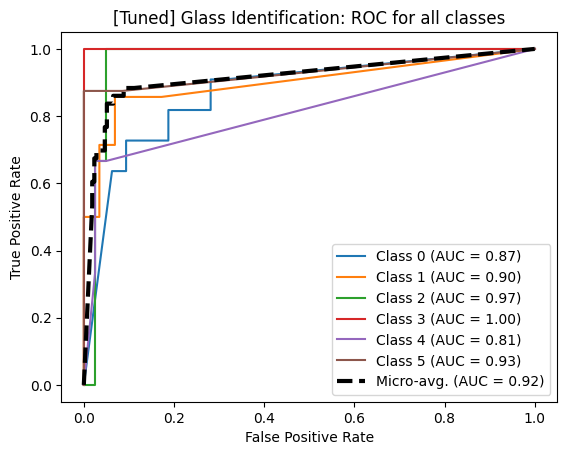

In [ ]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert y_test to one-hot encoded matrix
n_classes = len(np.unique(y_train))
y_test_l = label_binarize(y_test, classes=np.arange(n_classes))


# Create an OvR classifier
ovr_classifier = OneVsRestClassifier(knn_classifier2)

# Fit the model to the training data
ovr_classifier.fit(X_train,y_train)
# Predict probabilities for each class
y_scores2 = ovr_classifier.predict_proba(X_test)

# Compute the FPR, TPR, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_l[:, i], y_scores2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_l.ravel(), y_scores2.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Aggregate the results with macro-average
all_fpr = np.unique(np.concatenate(list(fpr.values())))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot the ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot(fpr_micro, tpr_micro, color='black', linestyle='--', linewidth=3, label='Micro-avg. (AUC = %0.2f)' % roc_auc_micro)
#plt.plot(all_fpr, mean_tpr, color='red', linestyle='--', linewidth=3,label='Macro-average (AUC = %0.2f)' % roc_auc_macro)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[Tuned] Glass Identification: ROC for all classes')
plt.legend(loc='lower right')
plt.show()


**Confusion Matrix** 

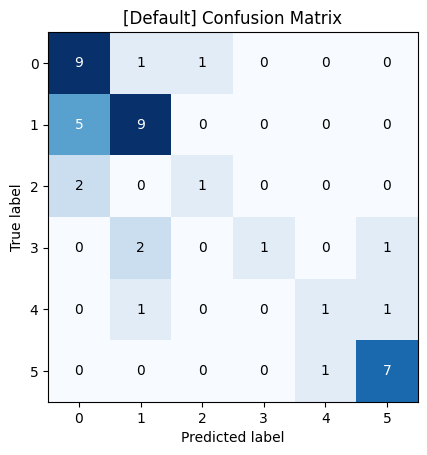

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
# for the Glass Identification dataset
# Fit the model to the training data
knn_classifier1.fit(X_train,y_train)
y_scores1 = knn_classifier1.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_scores1)

# Create a figure and axis for the plot
fig, ax = plt.subplots()
# Plot the confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# Set the labels for the x-axis and y-axis
classes = np.unique(y_test)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       title='[Default] Confusion Matrix')
# Rotate the x-axis labels if needed
plt.setp(ax.get_xticklabels(),
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
accuracy = accuracy_score(y_test, y_scores1)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 65.12%


In [ ]:
import numpy as np

def calculate_rates(y_true, y_pred):
    # Get the unique classes
    classes = np.unique(y_true)
    
    tp_values, tn_values, fp_values, fn_values = [], [], [], []
    
    # Calculate TP, TN, FP, FN for each class
    for class_i in classes:
        mask_class_i = (y_true == class_i)
        mask_other_classes = (y_true != class_i)
        
        tp = np.sum((y_pred == class_i) & mask_class_i)
        tn = np.sum((y_pred != class_i) & mask_other_classes)
        fp = np.sum((y_pred == class_i) & mask_other_classes)
        fn = np.sum((y_pred != class_i) & mask_class_i)
        
        tp_values.append(tp)
        tn_values.append(tn)
        fp_values.append(fp)
        fn_values.append(fn)
    
    # Calculate total TP, TN, FP, FN
    total_tp = sum(tp_values)
    total_tn = sum(tn_values)
    total_fp = sum(fp_values)
    total_fn = sum(fn_values)
    
    # Calculate rates
    tpr = total_tp / (total_tp + total_fn)
    tnr = total_tn / (total_tn + total_fp)
    fpr = total_fp / (total_fp + total_tn)
    fnr = total_fn / (total_fn + total_tp)
    
    return tpr, tnr, fpr, fnr


In [ ]:
tpr, tnr, fpr, fnr = calculate_rates(y_test, y_scores1)

print(f"True Positive Rate (TPR): {round(tpr, 2)}")
print(f"True Negative Rate (TNR): {round(tnr, 2)}")
print(f"False Positive Rate (FPR): {round(fpr, 2)}")
print(f"False Negative Rate (FNR): {round(fnr, 2)}")

True Positive Rate (TPR): 0.65
True Negative Rate (TNR): 0.93
False Positive Rate (FPR): 0.07
False Negative Rate (FNR): 0.35


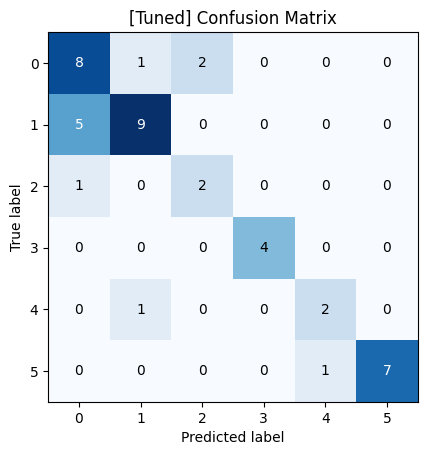

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
# for the Glass Identification dataset
knn_classifier2.fit(X_train,y_train)
y_scores2 = knn_classifier2.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_scores2)

# Create a figure and axis for the plot
fig, ax = plt.subplots()
# Plot the confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# Set the labels for the x-axis and y-axis
classes = np.unique(y_test)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       title='[Tuned] Confusion Matrix')
# Rotate the x-axis labels if needed
plt.setp(ax.get_xticklabels(),
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

# Display the plot
plt.show()

In [ ]:
tpr, tnr, fpr, fnr = calculate_rates(y_test, y_scores2)

print(f"True Positive Rate (TPR): {round(tpr, 2)}")
print(f"True Negative Rate (TNR): {round(tnr, 2)}")
print(f"False Positive Rate (FPR): {round(fpr, 2)}")
print(f"False Negative Rate (FNR): {round(fnr, 2)}")

True Positive Rate (TPR): 0.74
True Negative Rate (TNR): 0.95
False Positive Rate (FPR): 0.05
False Negative Rate (FNR): 0.26


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
accuracy = accuracy_score(y_test, y_scores2)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 74.42%


In [ ]:
y_test.shape

(43,)